In [1]:
# import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import preprocessing
import datetime as dt
from sklearn.preprocessing import StandardScaler
from scipy import stats
from datetime import timedelta
import squarify

In [2]:
# read the data
data = pd.read_csv('Online Retail.csv', encoding= 'unicode_escape')
data.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-10 8:26,3.39,17850.0,United Kingdom


# Understanding the Data

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [4]:
data.shape

(541909, 8)

In [5]:
data.dropna()
data.shape

(541909, 8)

Form the shape of the data we can see that there are 541909 instances and 8 variables and no missing value in the data

## Elimination of variables and Descriptive Statistics

We should remove the columns like "InvoiceNo, StockCode, Description, InvoiceDate, CustomerID and Country". Because finding the decriptive statistics of these columns is worthless 

In [6]:
data1 = data[['Quantity', 'UnitPrice']]

In [7]:
data1.describe()

,Quantity,UnitPrice
count,541909.000000,541909.000000
mean,9.552250,4.611114
std,218.081158,96.759853
min,-80995.000000,-11062.060000
25%,1.000000,1.250000
50%,3.000000,2.080000
75%,10.000000,4.130000
max,80995.000000,38970.000000


## Data Normalization (Transformation)

Data normalization is used to transform the data to get zero mean and unit variance

In [8]:
data1[['Quantity', 'UnitPrice']] = pd.DataFrame(preprocessing.normalize(data1))
data1.head(5)

C:\Users\HP\anaconda3\lib\site-packages\pandas\core\frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,Quantity,UnitPrice
0,0.920331,0.391141
1,0.870644,0.491914
2,0.945687,0.325080
3,0.870644,0.491914
4,0.870644,0.491914


## Distribution

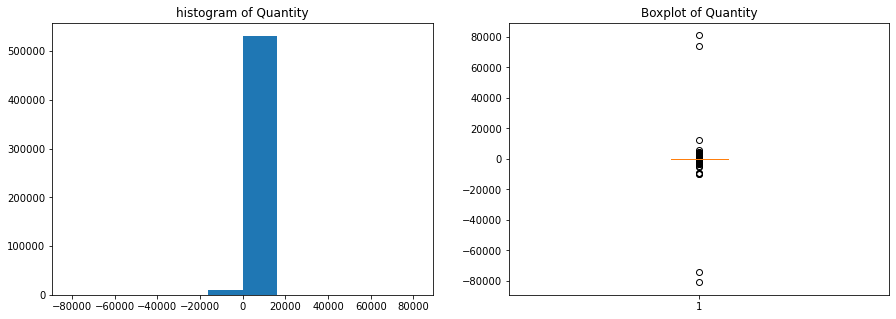

In [9]:
plt.figure(figsize = [15,5])
plt.subplot(1,2,1)
plt.hist(data['Quantity'], bins = 10)
plt.title('histogram of Quantity')


plt.subplot(1,2,2)
plt.boxplot(data['Quantity'])
plt.title('Boxplot of Quantity')
plt.show()

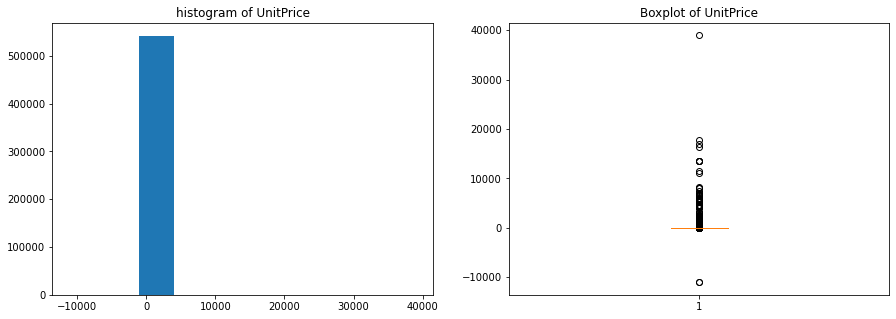

In [10]:
plt.figure(figsize = [15,5])

plt.subplot(1,2,1)
plt.hist(data['UnitPrice'])
plt.title('histogram of UnitPrice')


plt.subplot(1,2,2)
plt.boxplot(data['UnitPrice'])
plt.title('Boxplot of UnitPrice')
plt.show()

## Correlation 

In [11]:
corr = data1.corr()
corr

,Quantity,UnitPrice
Quantity,1.000000,-0.774113
UnitPrice,-0.774113,1.000000


# RFM Segmentation

## RFM Metrics
RFM criterion is one of the oldest and most widely used technique for selecting the most significant customers. It supports the selection of customers that are most recent (R), frequent (F), and add a larger monetary value (M) in every transaction.
Recency (R): Recency is the most important predictor of who is more likely to respond to an offer. Customers who have purchased recently are more likely to purchase again when compared to those who did not purchase recently.
Frequency (F): The second most important factor is how frequently these customers purchase. The higher the frequency, the higher is the chances of these responding to the offers.
Monetary Value (M): The third factor is the amount of money these customers have spent on purchases. Customers who have spent higher contribute more value to the business as compared to those who have spent less.

In [12]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

In [13]:
# --Group data by customerID--# Create TotalSum column for online dataset
data['TotalSum'] = data['Quantity'] * data['UnitPrice']

In [14]:
# Create snapshot date
snapshot_date = data['InvoiceDate'].max()+ timedelta(days=1)
print(snapshot_date)

2011-12-11 17:19:00


To calculate recency, we will be taking one day after the last invoice date of our data set as the snapshot date ‘2011–12–10 12:50:00’. The date difference will give us how recent the last transaction was made. With that, we can then group our ‘online’ dateframe by customer ID and assign it to ‘data_process’ for our data pre-processing.

In [15]:
# Grouping by CustomerID
data_process = data.groupby(['CustomerID']).agg({
        'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
        'InvoiceNo': 'count',
        'TotalSum': 'sum'})

In [16]:
# Rename the columns 
data_process.rename(columns={'InvoiceDate': 'Recency',
                         'InvoiceNo': 'Frequency',
                         'TotalSum': 'MonetaryValue'}, inplace=True)

In [17]:
# Print top 5 rows and shape of dataframe
print(data_process.head())
print('{:,} rows; {:,} columns'
      .format(data_process.shape[0], data_process.shape[1]))

            Recency  Frequency  MonetaryValue
CustomerID                                   
12346.0         327          2           0.00
12347.0          41        182        4310.00
12348.0          77         31        1797.24
12349.0          20         73        1757.55
12350.0         312         17         334.40
4,372 rows; 3 columns


we have 4,372 customer records grouped by recency of their purchase, the frequency by their quantity, and the monetary value of the purchases.

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level functi

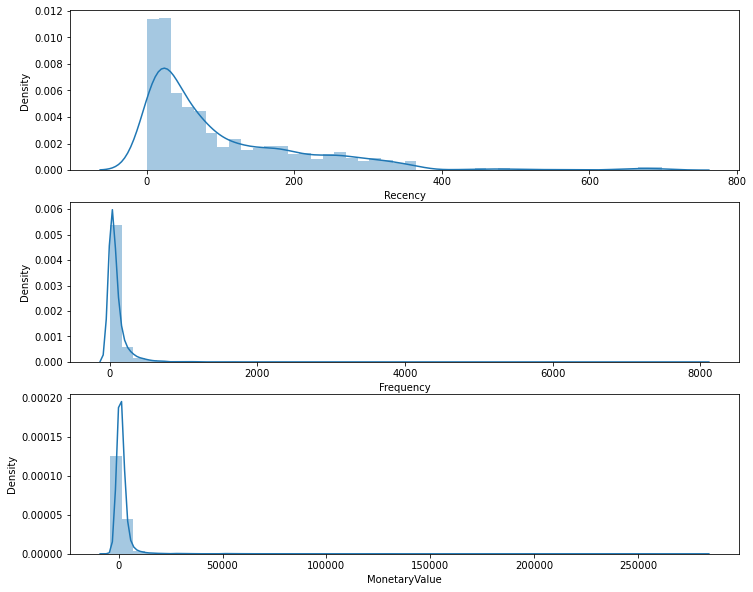

In [18]:
# Plot RFM distributions
plt.figure(figsize=(12,10))# Plot distribution of R
plt.subplot(3, 1, 1); sns.distplot(data_process['Recency'])# Plot distribution of F
plt.subplot(3, 1, 2); sns.distplot(data_process['Frequency'])# Plot distribution of M
plt.subplot(3, 1, 3); sns.distplot(data_process['MonetaryValue'])# Show the plot
plt.show()

This plot provides us with some very interesting insights and how skewed our data is. The important thing to take note here is that we will be grouping these values in quantiles. However, when we examine our customer segmentation using K-Means in the next, it will be very important to ensure that we scale our data to center the mean and standard deviations. More on that next time. Let us proceed with the .qcut() for our RFM.

In [19]:
# --Calculate R and F groups--# Create labels for Recency and Frequency
r_labels = range(4, 0, -1); f_labels = range(1, 5)# Assign these labels to 4 equal percentile groups 
r_groups = pd.qcut(data_process['Recency'], q=4, labels=r_labels)# Assign these labels to 4 equal percentile groups 
f_groups = pd.qcut(data_process['Frequency'], q=4, labels=f_labels)# Create new columns R and F 
data_process = data_process.assign(R = r_groups.values, F = f_groups.values)
data_process.head()

,Recency,Frequency,MonetaryValue,R,F
CustomerID,,,,,
12346.0,327,2,0.00,1,1
12347.0,41,182,4310.00,3,4
12348.0,77,31,1797.24,2,2
12349.0,20,73,1757.55,4,3
12350.0,312,17,334.40,1,1


We create a 4 labels for our f_labels, where 4 is the “best” quantile. We do the same for our f_label. We then create new columns “R” and “F” and assign the r_group and f_group values to them respectively.
Next, we do the same for our monetary value by grouping the values into 4 quantiles using .qcut() method.

In [20]:
# Create labels for MonetaryValue
m_labels = range(1, 5)# Assign these labels to three equal percentile groups 
m_groups = pd.qcut(data_process['MonetaryValue'], q=4, labels=m_labels)# Create new column M
data_process = data_process.assign(M = m_groups.values)

Finally, with these 3 scores in place, R, F, and M, we can create our first RFM segment by concatenating the values together below. Let’s assign our data_process dataframe to our newly created rfm dataframe.

In [21]:
# Concat RFM quartile values to create RFM Segments
def join_rfm(x):
    return str(x['R']) + str(x['F']) + str(x['M'])
    

In [22]:
data_process['RFM_Segment_Concat'] = data_process.apply(join_rfm, axis=1)
rfm = data_process
rfm.head()

,Recency,Frequency,MonetaryValue,R,F,M,RFM_Segment_Concat
CustomerID,,,,,,,
12346.0,327,2,0.00,1,1,1,1.01.01.0
12347.0,41,182,4310.00,3,4,4,3.04.04.0
12348.0,77,31,1797.24,2,2,4,2.02.04.0
12349.0,20,73,1757.55,4,3,4,4.03.04.0
12350.0,312,17,334.40,1,1,2,1.01.02.0


In [23]:
# Calculate RFM_Score
rfm['RFM_Score'] = rfm[['R','F','M']].sum(axis=1)
print(rfm['RFM_Score'].head())

CustomerID
12346.0     3
12347.0    11
12348.0     8
12349.0    11
12350.0     4
Name: RFM_Score, dtype: int64


In [24]:
# Define rfm_level function
def rfm_level(df):
    if df['RFM_Score'] >= 9:
        return 'Can\'t Loose Them'
    elif ((df['RFM_Score'] >= 8) and (df['RFM_Score'] < 9)):
        return 'Champions'
    elif ((df['RFM_Score'] >= 7) and (df['RFM_Score'] < 8)):
        return 'Loyal'
    elif ((df['RFM_Score'] >= 6) and (df['RFM_Score'] < 7)):
        return 'Potential'
    elif ((df['RFM_Score'] >= 5) and (df['RFM_Score'] < 6)):
        return 'Promising'
    elif ((df['RFM_Score'] >= 4) and (df['RFM_Score'] < 5)):
        return 'Needs Attention'
    else:
        return 'Require Activation'# Create a new variable RFM_Level
rfm['RFM_Level'] = rfm.apply(rfm_level, axis=1)# Print the header with top 5 rows to the console
rfm.head()

,Recency,Frequency,MonetaryValue,R,F,M,RFM_Segment_Concat,RFM_Score,RFM_Level
CustomerID,,,,,,,,,
12346.0,327,2,0.00,1,1,1,1.01.01.0,3,Require Activation
12347.0,41,182,4310.00,3,4,4,3.04.04.0,11,Can't Loose Them
12348.0,77,31,1797.24,2,2,4,2.02.04.0,8,Champions
12349.0,20,73,1757.55,4,3,4,4.03.04.0,11,Can't Loose Them
12350.0,312,17,334.40,1,1,2,1.01.02.0,4,Needs Attention


In [25]:
# Calculate average values for each RFM_Level, and return a size of each segment 
rfm_level_agg = rfm.groupby('RFM_Level').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'MonetaryValue': ['mean', 'count']
}).round(1)# Print the aggregated dataset
print(rfm_level_agg)

                   Recency Frequency MonetaryValue      
                      mean      mean          mean count
RFM_Level                                               
Can't Loose Them      31.3     193.1        4100.3  1710
Champions             67.4      56.7         996.8   447
Loyal                 91.2      40.5         735.5   428
Needs Attention      188.7      14.1         200.9   375
Potential            110.4      29.0         452.2   496
Promising            163.1      21.4         339.2   528
Require Activation   286.9       7.8         127.7   388


In [26]:
rfm_level_agg.columns = ['RecencyMean','FrequencyMean','MonetaryMean', 'Count']

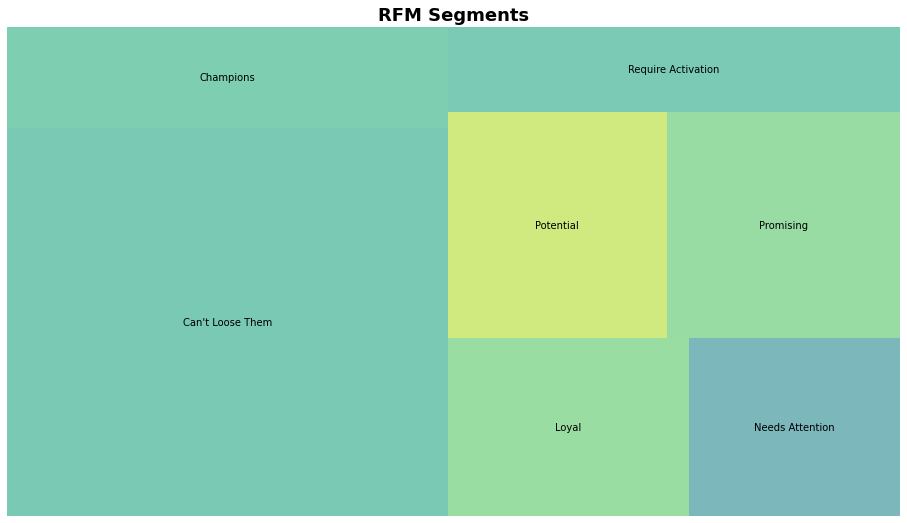

In [27]:
#Create our plot and resize it.
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(16, 9)
squarify.plot(sizes=rfm_level_agg['Count'], 
              label=['Can\'t Loose Them',
                     'Champions',
                     'Loyal',
                     'Needs Attention',
                     'Potential', 
                     'Promising', 
                     'Require Activation'], alpha=.6 )
plt.title("RFM Segments",fontsize=18,fontweight="bold")
plt.axis('off')
plt.show()

From here, we can see that a large percentage (~60%) of our customers are in the top tier RFM levels. The store must be doing something right to be maintaining their loyalty!

The other 40% will need some work. Let’s explore using some ads to re-target them:
1.Potential — high potential to enter our loyal customer segments, why not throw in some freebies on their next purchase to show that you value them!
2.Promising — showing promising signs with quantity and value of their purchase but it has been a while since they last bought sometime from you. Let’s target them with their wishlist items and a limited time offer discount.
3.Needs Attention — made some initial purchase but have not seen them since. Was it a bad customer experience? Or product-market fit? Let’s spend some resource build our brand awareness with them.
4.Require Activation — Poorest performers of our RFM model. They might have went with our competitors for now and will require a different activation strategy to win them back.

# KMeans Clustering

In [28]:
data_process_fix = pd.DataFrame()
data_process_fix["Recency"] = stats.boxcox(data_process['Recency'])[0]
data_process_fix["Frequency"] = stats.boxcox(data_process['Frequency'])[0]
data_process_fix["MonetaryValue"] = pd.Series(np.cbrt(data_process['MonetaryValue'])).values
data_process_fix.tail()

,Recency,Frequency,MonetaryValue
4367,8.350754,2.460908,5.652483
4368,1.869403,2.058202,4.323541
4369,7.060474,2.762414,5.610440
4370,3.004979,8.057611,12.795376
4371,0.000000,4.808490,12.247810


In [29]:
# Initialize the Object
scaler = StandardScaler()
# Fit and Transform The Data
scaler.fit(data_process_fix)
customers_normalized = scaler.transform(data_process_fix)

# Assert that it has mean 0 and variance 1
print(customers_normalized.mean(axis = 0).round(2)) # [0. -0. 0.]
print(customers_normalized.std(axis = 0).round(2)) # [1. 1. 1.]

[-0.  0. -0.]
[1. 1. 1.]


each variable don’t have the same mean and variance. We have to normalize it. To normalize, we can use StandardScaler object from scikit-learn library to do it

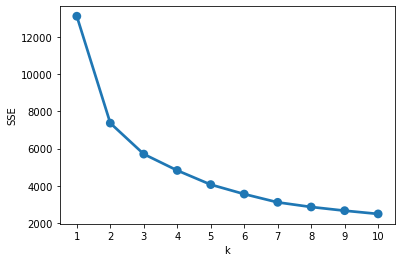

In [30]:
sse = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(customers_normalized)
    sse[k] = kmeans.inertia_ # SSE to closest cluster centroidplt.title('The Elbow Method')
plt.xlabel('k')
plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

The x-axis is the value of the k, and the y-axis is the SSE value of the data. We will take the best parameter by looking at where the k-value will have a linear trend on the next consecutive k.

Based on our observation, the k-value of 3 is the best hyperparameter for our model because the next k-value tend to have a linear trend. Therefore, our best model for the data is K-Means with the number of clusters is 3.

A fundamental step for any unsupervised algorithm is to determine the optimal number of clusters into which the data may be clustered. The Elbow Method is one of the most popular methods to determine this optimal value of k. In good clustering, the distance between the points should be minimum within cluster, and between the clusters the distance should be maximize.

In [31]:
model = KMeans(n_clusters=3, random_state=42)
model.fit(customers_normalized)
model.labels_.shape

(4372,)

In [32]:
data_process["Cluster"] = model.labels_
data_process.groupby('Cluster').agg({
    'Recency':'mean',
    'Frequency':'mean',
    'MonetaryValue':['mean', 'count']}).round(2)

Recency Frequency MonetaryValue      
           mean      mean          mean count
Cluster                                      
0         22.73    326.84       7799.77   724
1        195.38     20.29        352.51  1732
2         47.43     70.49       1066.01  1916

We can summarize the RFM table based on clusters and calculate the mean of each variable

In [33]:
# Create the dataframe
df_normalized = pd.DataFrame(customers_normalized, columns=['Recency', 'Frequency', 'MonetaryValue'])
df_normalized['ID'] = data_process.index
df_normalized['Cluster'] = model.labels_

# Melt The Data
df_nor_melt = pd.melt(df_normalized.reset_index(),
                      id_vars=['ID', 'Cluster'],
                      value_vars=['Recency','Frequency','MonetaryValue'],
                      var_name='Attribute',
                      value_name='Value')
df_nor_melt.head()

,ID,Cluster,Attribute,Value
0,12346.0,1,Recency,1.571838
1,12347.0,0,Recency,-0.282315
2,12348.0,2,Recency,0.208549
3,12349.0,2,Recency,-0.777064
4,12350.0,1,Recency,1.521717


we can analyze the segments using snake plot. It requires the normalized dataset and also the cluster labels. By using this plot, we can have a good visualization from the data on how the cluster differs from each other

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Attribute', ylabel='Value'>

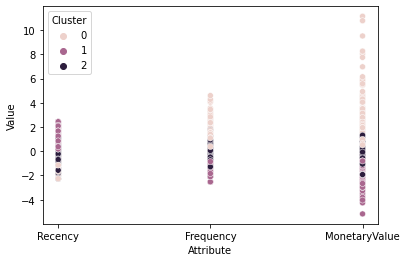

In [44]:
sns.scatterplot('Attribute', 'Value', hue='Cluster', data=df_nor_melt)

By using this plot, we know how each segment differs. It describes more than we use the summarized table.
We infer that cluster 0 is frequent, spend more, and they buy the product recently. Therefore, it could be the cluster
of a loyal customer.
Then, the cluster 1 is less frequent, less to spend, but they buy the product recently. Therefore, it could be the
cluster of new customer.
Finally, the cluster 2 is less frequent, less to spend, and they buy the product at the old time. Therefore, 
it could be the cluster of churned customers.